
## <center>Assignment 2. Unsupervised learning: k-means algorithm as an example.</center>
### Carry out the following exercises:
* Run k-means algorithm on data, use the k-means sklearn version
* Make experiments on your algorithm with different values of k
* Utilize the Elbow method
* Consider what is the effect of different training/testing split portions on your data now, e.g 80/20 training/testing split we used earlier
* Test the effect of various options of the k-means algorithm. (See the sklean documentation for k-means)

## <center>Sagan kommentoima notebook: </center>

## "Mall Customer Segmentation"
https://www.kaggle.com/code/tanmay111999/unsupervised-learning-3-6-clusters-k-means-eda/input

Ostoskeskus-asiakkaiden luokittelu/ryhmittely numeeristen ja kategoristen ominaisuuksien perusteella. Kyseessä on ohjaamattoman oppimisen ongelma.

### Datan attribuutit, eli numeeriset ja kategoriset muuttujat:
    
- **CustomerID** : Unique ID assigned to the customer
- **Gender** : Gender of the customer (ainoa kategorinen muuttuja muiden numeeristen joukossa)
- **Age** : Age of the customer
- **Annual Income (k\\$)** : Annual Income of the customer
- **Spending Score (1-1000)** : Score assigned by the mall based on customer behavior and spending nature

Tämä datasetti tarjoaa mahdollisuuden tarkastella asiakasdataa liiketoiminnan edistämiseksi ohjaamattoman oppimisen avulla. Tuotettua dataa voidaan hyödyntää räätälöityjrn myyntistrategioiden luomisessa.

Ohjaamattomien oppimisongelmien tapauksessa EDA (Exploratory Data Analysis) osoittautuu erittäin arvokkaaksi:
* EDA auttaa koneoppimismallin rakentamisessa varmistamalla, että data on ymmärretty kunnolla ja että siihen liittyvät kysymykset on otettu huomioon. 
* Se voi myös auttaa tunnistamaan ongelmia, jotka vaativat lisää dataa kerättäväksi tai puhdistettavaksi ennen kuin malli voidaan rakentaa. 
* EDA on tärkeä osa data-analyysia ja auttaa analysoijia tekemään parempia päätöksiä datan käytössä 
* Kuitenkin visualisointien monimutkaisuus voi olla este, kun piirrettävien ominaisuuksien määrä ja datan koko kasvavat.

K-Means-klusterointialgoritmin tapauksessa hyperparametrin **k** valinta on ratkaisevan tärkeää, ja se tehdään tilastollisten testien avulla. Tässä tapauksessa ei ole suurta eroa mallin suorituskyvyssä, kun se on koulutettu alkuperäisellä datalla verrattuna normalisoituun dataan.

# <center>Dataset Information</center>

### Import the Necessary Libraries :

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

In [27]:
data = pd.read_csv('C:/Users/sagan/Desktop/Machine_Learning/k-mean-files/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Info :

In [28]:
print("The number of rows and columns: ")
data.shape

The number of rows and columns: 


(200, 5)

In [29]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Seuraavaksi haluamme ymmärtää datan koon, ja voimme käyttää seuraavaa tapaa saadaksemme tietää rivien ja sarakkeiden määrän  dataframessa.   

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Kommentti data.infon antamista tiedoista: 
Lyhyt kuvaus DataFramesta ja sen sarakkeista:

CustomerID: Asiakkaan tunniste, joka on kokonaisluku (int64).
Gender: Asiakkaan sukupuoli, joka on merkkijono (object).
Age: Asiakkaan ikä, kokonaisluku (int64).
Annual Income (k$): Asiakkaan vuosittainen tulo tuhansina dollareina, kokonaisluku (int64).
Spending Score (1-100): Asiakkaan kulutuspistemäärä asteikolla 1-100, kokonaisluku (int64).
DataFrame sisältää yhteensä 200 riviä (asiakasta) ja 5 saraketta (ominaisuutta). 

Datan kaikilla sarakkeilla on 200 voimassa olevaa arvoa, eli 0-arvojen käsittelyä ei luultavasti tarvita.

Tämä on tyypillinen esimerkki datasta, jota voidaan käyttää asiakkaiden segmentoinnissa tai klusteroinnissa liiketoimintastrategioiden kehittämiseksi, kuten esimerkiksi asiakkaiden ryhmittely kauppojen markkinointikampanjoita varten. Kunkin sarakkeen tyyppi (int64 tai object) määrittelee, kuinka kunkin ominaisuuden dataa käsitellään analyysin aikana.

heatmap: 
Koodissa käytetään `heatmap`-funktiota visualisoimaan puuttuvat arvot värillisellä kartalla.

- `data.isnull()` palauttaa DataFrame-objektin, jossa `True`-arvot merkitsevät puuttuvia arvoja ja `False`-arvot merkitsevät voimassa olevia arvoja.
- `cmap = 'magma'` asettaa heatmapin värikartaksi "magma", joka määrittelee, miten värin sävy vaihtelee arvojen mukaan.
- `cbar = False` poistaa heatmapista värikartan oikeassa laidassa olevan värikartan. 

Kun koodi suoritetaan, se luo heatmapin, jossa puuttuvat arvot näkyvät tummina alueina ja voimassa olevat arvot vaaleina alueina. Tämä voi auttaa sinua tunnistamaan, missä kohdissa datassa on puuttuvia arvoja, mikä on tärkeää datan puhdistamisessa ja käsittelyssä ennen analyysiä.

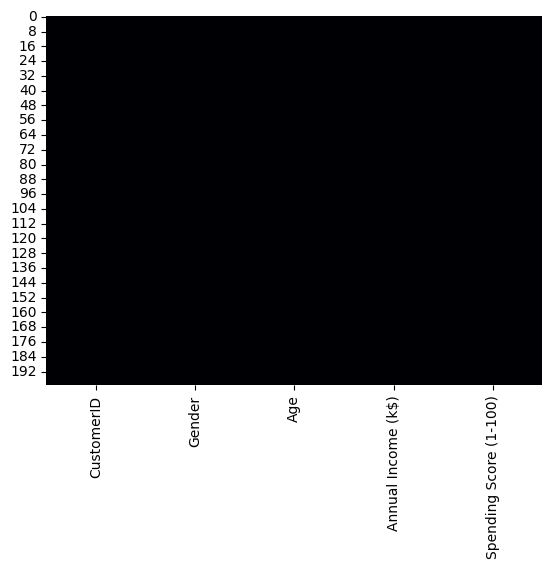

In [31]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

- **No null values** present in the data!

 Alla kuvaaja: 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5)) luo yhden subplotin (kuvaajan) koko 5x5 tuuman kokoisena.

Kun koodi suoritetaan, se piirtää heatmapin, joka esittää DataFrame-keskiarvoja väreillä ja annotaatioilla. Tämä voi auttaa havainnollistamaan datan keskiarvojen jakautumista ja eri ominaisuuksien keskimääräisiä arvoja.

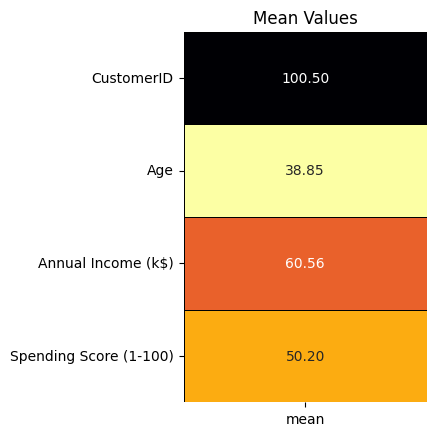

In [32]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5))

plt.subplot(1,1,1)
sns.heatmap(data.describe().T[['mean']],cmap = 'inferno_r',annot = True,fmt = '.2f',linecolor = 'black',linewidths = 0.4,cbar = False);
plt.title('Mean Values');

fig.tight_layout(pad = 3)

- Average customer **Age** in the dataset is in the late 30s i.e **38.85**. 
- Average **Annual Income (k\\$)** of the customers is **60.56** i.e just short of the 2018 median income of USA citizen, 63k$.
- **Spending Score (1-100)** average of the mall customer is in the center with **50.20**.

# <center>Exploratory Data Analysis</center>

### Dividing features into Numerical and Categorical :

In [33]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Gender
Numerical Features : CustomerID Age Annual Income (k$) Spending Score (1-100)



Tämä koodinpätkä jakaa datan sarakkeet kategorisiin ja numeerisiin ominaisuuksiin seuraavasti:

Se alustaa kaksi tyhjää listaa categorical_features ja numerical_features kategorisia ja numeerisia ominaisuuksia varten.

Sen jälkeen se käy läpi kaikki datan sarakkeet sarakelistan col avulla.

Tarkasteltaessa jokaista saraketta se tarkistaa, kuinka monta uniikkia arvoa sarakkeessa on (len(data[i].unique())). Jos uniikkien arvojen määrä on suurempi kuin 6, saraketta pidetään numeerisena, muussa tapauksessa se luokitellaan kategoriseksi.

Lopuksi koodi tulostaa kategoriset ja numeeriset ominaisuudet.

Tämä voi olla hyödyllistä tunnistettaessa, mitkä sarakkeet datassa ovat kategorisia (esimerkiksi sukupuoli tai luokat) ja mitkä ovat numeerisia (esimerkiksi ikä tai tulot). Tällainen tieto voi auttaa valitsemaan oikeat analyysimenetelmät ja visualisoinnit datan käsittelyssä ja tulkinnassa.

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = data.copy(deep = True)

df1['Gender'] = le.fit_transform(df1['Gender'])

print('Label Encoder Transformation')
print(df1['Gender'].unique(),' = ',le.inverse_transform(df1['Gender'].unique()))

Label Encoder Transformation
[1 0]  =  ['Male' 'Female']


Tämä koodipätkä käyttää Scikit-Learn-kirjaston `LabelEncoder`-työkalua muuntamaan kategoriset arvot numeerisiksi. Koodi kopioi DataFrame `data` -olion `df1`-nimiseen kopioon, jotta alkuperäistä dataa ei muuteta. Sitten se muuntaa "Gender" -sarakkeen numeeriseksi LabelEncoderin avulla ja tulostaa alkuperäiset ja muunnetut arvot. Tässä on selitys:

1. `from sklearn.preprocessing import LabelEncoder` - Tuodaan `LabelEncoder` Scikit-Learn-kirjastosta.

2. `le = LabelEncoder()` - Alustetaan `LabelEncoder`-olio nimellä `le`.

3. `df1 = data.copy(deep=True)` - Luodaan syvä kopio alkuperäisestä DataFramesta `data` muuttujan `df1` alle.

4. `df1['Gender'] = le.fit_transform(df1['Gender'])` - Käytetään `LabelEncoder`-oliota muuntamaan "Gender" -sarakkeen kategoriset arvot numeerisiksi. Tämä muutos tehdään `fit_transform`-funktiolla.

5. `print('Label Encoder Transformation')` - Tulostetaan otsikko merkitsemään, että seuraavat tulosteet liittyvät LabelEncoderin muunnoksiin.

6. `print(df1['Gender'].unique(), ' = ', le.inverse_transform(df1['Gender'].unique()))` - Tulostetaan muunnetun "Gender" -sarakkeen ainutlaatuiset numeeriset arvot ja niiden alkuperäiset vastineet `inverse_transform`-funktion avulla.

Tämä auttaa muuttamaan kategoriset arvot numeerisiksi, mikä voi olla tarpeen monissa koneoppimisen malleissa, jotka vaativat numeerisia syötteitä.

### Distribution of Categorical and Numerical Features :

Tämä koodipätkä käyttää Seaborn-kirjastoa visualisoimaan datan jakaumia kategoristen ja numeeristen ominaisuuksien osalta. Koodi luo kaksi kuvaajaa (yksi kategorisille ja toinen numeerisille ominaisuuksille) ja piirtää niiden jakaumat. Tämä koodi auttaa havainnollistamaan datan jakaumia sekä kategoristen että numeeristen ominaisuuksien osalta. Se voi auttaa tunnistamaan, miten data on jakautunut ja mahdollisesti poikkeavuuksia tai kuvioita, jotka voivat olla hyödyllisiä analyysissa.

C:\Users\sagan\AppData\Local\Temp\ipykernel_20344\2329426168.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1});
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\seaborn\distributions.py:2511: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: i

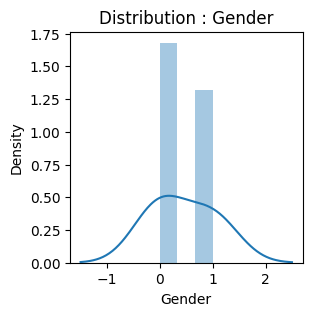

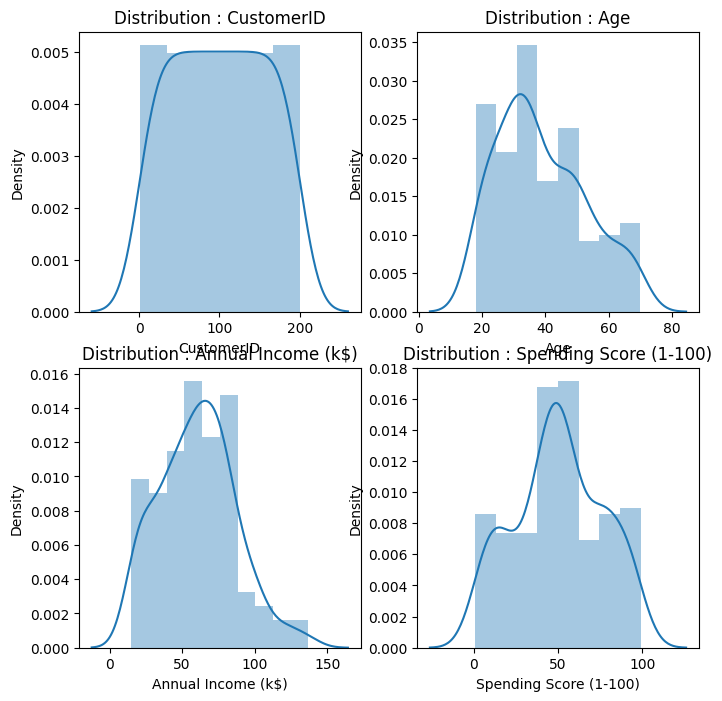

In [35]:
fig, ax = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3))
for i in range(len(categorical_features)):
    plt.subplot(1,1,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1});
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)
    
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (8,8))
for i in range(len(numerical_features)):
    plt.subplot(2,2,i+1)
    sns.distplot(data[numerical_features[i]],)
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

- **Gender**, the only categorical feature, data displays a **normal distribution**.
- Distribution of **Age** and **Annual Income (k\\$)** is **positively or righly skewed**.
- **Spending Score (1-100)** data distribution is similar to the **Head and Shoulder** pattern observed in stock charts. 
- It displays a stock's price rising to a peak and then declines back to the base of the prior up-move. Something similar can be observed with the **2 shoulders** forming around the values **20 & 80** with **head** being centered in between **40 - 60**.


- We will drop the **CustomerID** feature as it is just a number that is tagged to a customer.

In [36]:
numerical_features.remove('CustomerID')

### Categorical Features :

Tämä koodi visualisoi sukupuolijakauman kahdella eri tavalla, piirakkana ja pylväskaaviona, ja antaa hyvän kuvan datassa olevista sukupuolen suhteista.

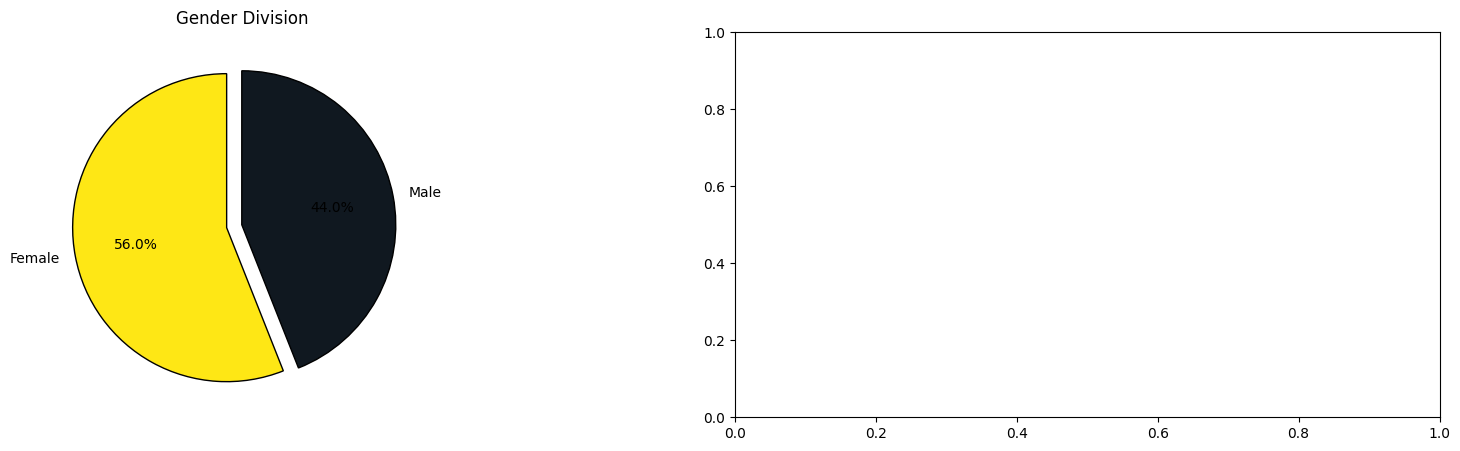

In [37]:
l = list(data['Gender'].value_counts())
circle = [l[0] / len(l) * 100, l[1] / len(l) * 100]
colors = ['#FEE715','#101820']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))

plt.subplot(1,2,1)
plt.pie(circle,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender Division');

#plt.subplot(1,2,2)
#ax = sns.countplot('Gender',data = df1,palette = colors,edgecolor = 'black');
#for rect in ax.patches:
    #ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.75, rect.get_height(), horizontalalignment='center', fontsize = 11)
#plt.title('Gender Count')
#ax.set_xticklabels(['Female','Male'])

plt.show()

- For the above dataset, **female** customers just edge out the **male** customers. 

### Numerical Features vs Categorical Features :

Näillä kuvaajilla voit tarkastella, miten numeeriset ominaisuudet jakautuvat sukupuolen mukaan ja havaita mahdollisia eroja tai yhtäläisyyksiä sukupuolten välillä datassa.

C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

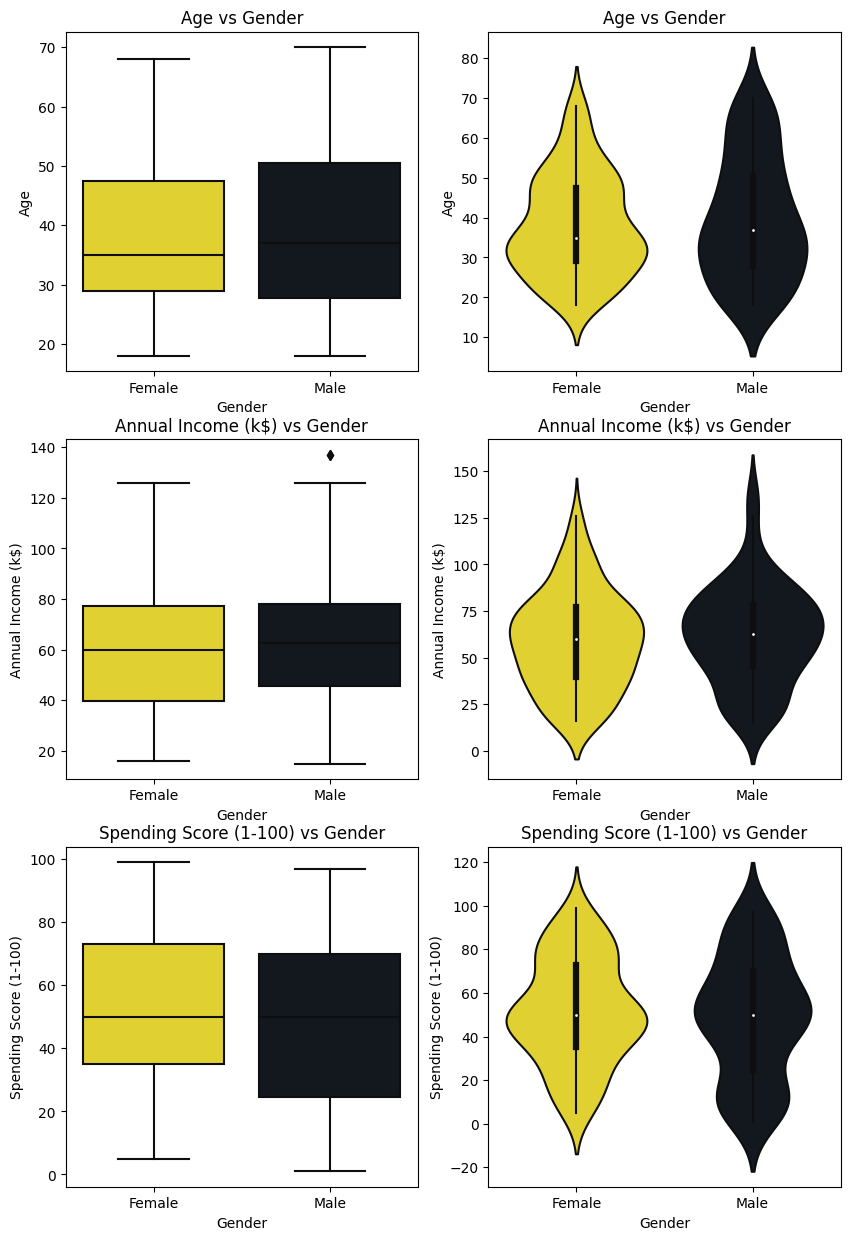

In [38]:
fig = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(numerical_features)):
    plt.subplot(3,2, (i * 2)  + 1)
    ax = sns.boxplot(x = 'Gender',y = numerical_features[i],palette = colors,data = df1)
    ax.set_xticklabels(['Female','Male'])
    title = numerical_features[i] + ' vs Gender'
    plt.title(title)
    
    plt.subplot(3,2,(i * 2) + 2)
    ax = sns.violinplot(x = 'Gender',y = numerical_features[i],palette = colors,data = df1)
    ax.set_xticklabels(['Female','Male'])
    title = numerical_features[i] + ' vs Gender'
    plt.title(title)

- **Age** range of **female** customers is from **30 to just below 50** whereas **male** customers **Age** ranges from **just below 30 to 50**. 
- For both **Genders**, a bulge at the age of **30 - 35** can be observed. Median **Age** of **male** is slightly more than those of **female**.
- For **Annual Income (k\\$)**, **female** customer's income starts from **40k** whereas **male** customer's is above this value. 
- Median **Annual Income (k\\$)** for both **Genders** is near about **60k**. **Annual Income (k\\$)** of **male** customers tapers very sharply at the apex with some outliers as compared to **female** customers.
- Median **Spending Score (1-100)** of both **Genders** is same despite having different starting points of **just below 40** & **just above 20** for **female** and **male** customers respectively.
- Both the **Genders** display a strong bulge at the median value especially **female** customers. However, **male** customers display a small but significant bulge in the range of **0 - 20** as well.

### Numerical Features vs Numerical Features w.r.t Categorical Feature :

Tämä koodi luo useita hajontakaavioita, jotka auttavat havainnollistamaan numeeristen ominaisuuksien suhdetta toisiinsa sukupuolen mukaan. Scatterplotit voivat paljastaa mahdollisia riippuvuuksia tai eroja numeeristen ominaisuuksien välillä ja kuinka sukupuoli voi vaikuttaa näihin suhteisiin.

C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

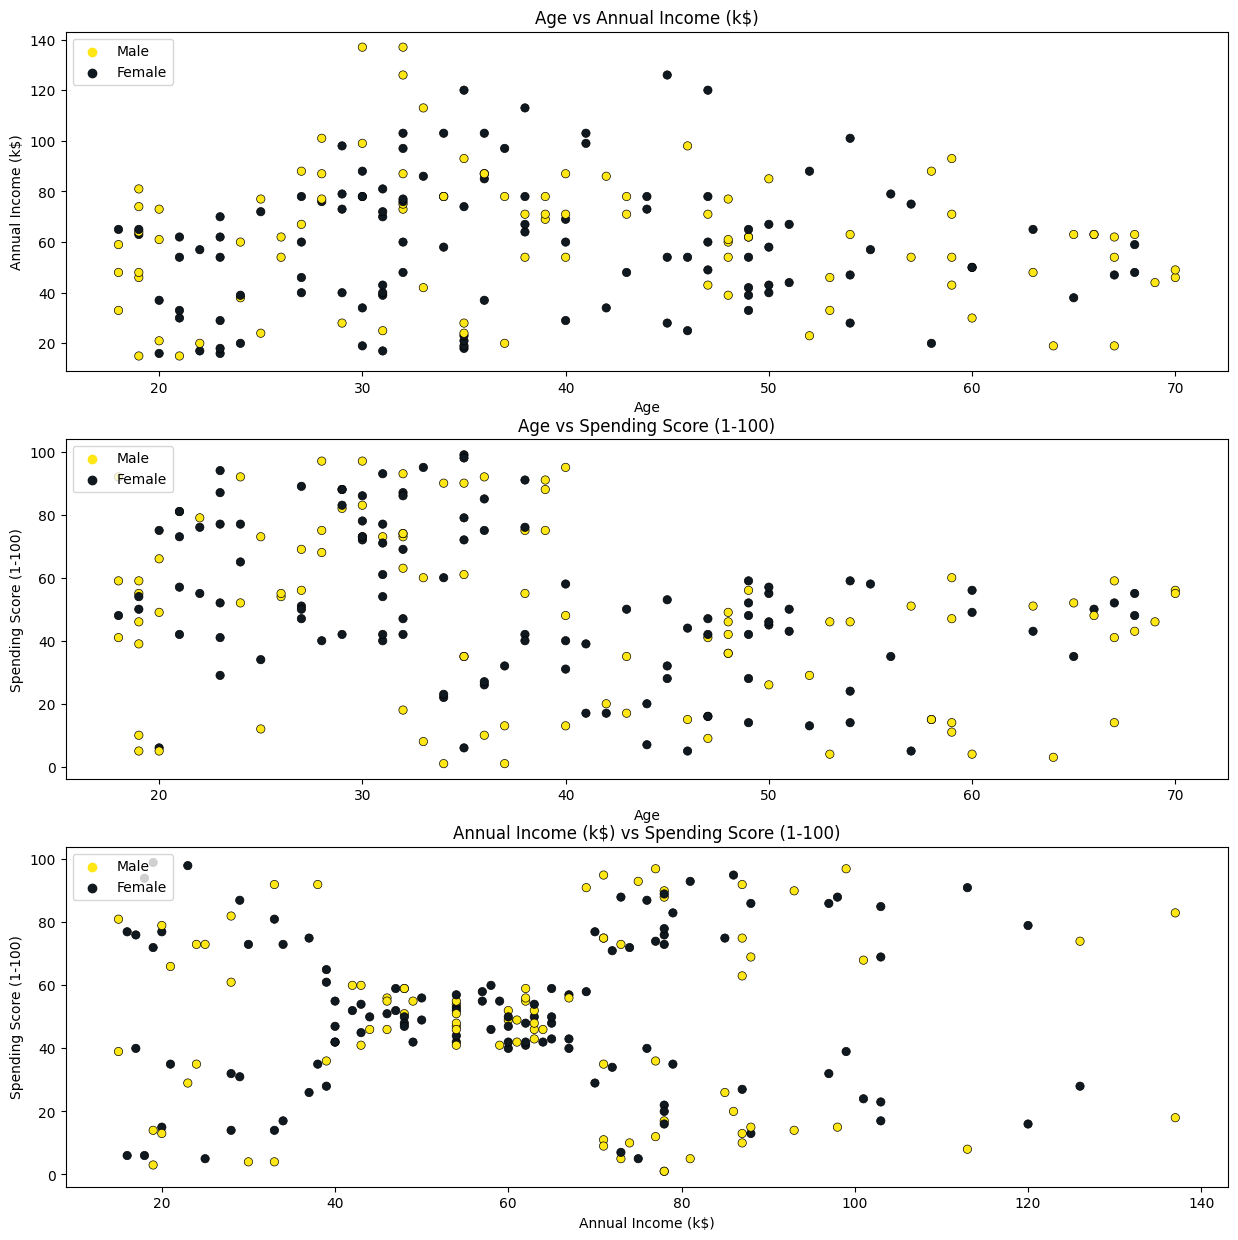

In [39]:
a = 0
fig,ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
for i in range(len(numerical_features) - 1):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(3,1,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = data,
                            hue = 'Gender',palette = colors,edgecolor = 'black');
            plt.legend(loc = 'upper left',)
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

- **Annual Income (k\\$)** datapoints are present throughout the all the **Age** values, **Gender** does not provide any significant information. 
- For **Spending Score (1-100)**, it can be clearly observed that **Age** ranges **20 - 30** display very high spending habits. 
- **Age** group **30 - 40** highlights both the extremes of spending habits in the customer. **40 - 70 Age** group customer displays the other end of spending habits with low values.    
- From the **Annual Income (k\\$) vs Spending Score (1-100)**, distinct 5 groups can be observed. For **Annual Income (k\\$)** values between **0 - 40**, data highlights 2 groups of customers with **Spending Score (1-100)** between **0 - 40** and **60 - 100**.
- After displaying this 1 extreme, data highlights the middle group of customers that have an **Annual Income (k\\$)** between **40 - 70k** and **Spending Score (1-100)** between **40 - 60**.
- **Annual Income (k\\$)** values between **70 - 140k** define the other extreme that is divided into 2 groups based on **Spending Score (1-100)** values of **0 - 40** and **60 - 100**.

# <center>Summary of EDA</center>

- For the above mall data, **female** customers are more than **male** customers. **Gender** data is pretty much evenly distributed w.r.t other features.
- Mall customers can be divided by their **Age** groups : 
    - **20 - 30** 
    - **30 - 40**
    - **40 - 70**. 
- Median **Annual Income (k\\$)** of both the **genders** is about **60k**. It displays 3 groups of values : 
    - **0 - 40k** 
    - **40 - 70k**
    - **70 - 140k**.
- **Spending Score (1-100)** of **female** is higher than **male** customers. It can also divide the customers into 3 groups :
    - **0 - 40**
    - **40 - 60**
    - **60 - 100**
- Using the combination of the above values, **Mall Customers** can be segmented and thus resulting in specific catering of them. 

# <center>Feature Engineering</center>

### Correlation Matrix :

Nämä kuvaajat näyttävät korrelaatiot numeeristen ominaisuuksien välillä datassa. Yläkolmiomuotoinen näyttää korrelaatiot yläpuolella olevissa kolmioissa, kun taas alakolmiomuotoinen näyttää korrelaatiot alapuolella olevissa kolmioissa. Tämä voi auttaa tunnistamaan, mitkä ominaisuudet ovat vahvasti korreloituneita keskenään.
Kun käytät K-means-klusterointia, voi olla hyödyllistä tarkastella korrelaatiomatriisia (correlation matrix) datalle. Tämä auttaa ymmärtämään mahdollisia riippuvuuksia tai korrelaatioita eri piirteiden välillä ennen kuin suoritat klusterointianalyysin.

C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


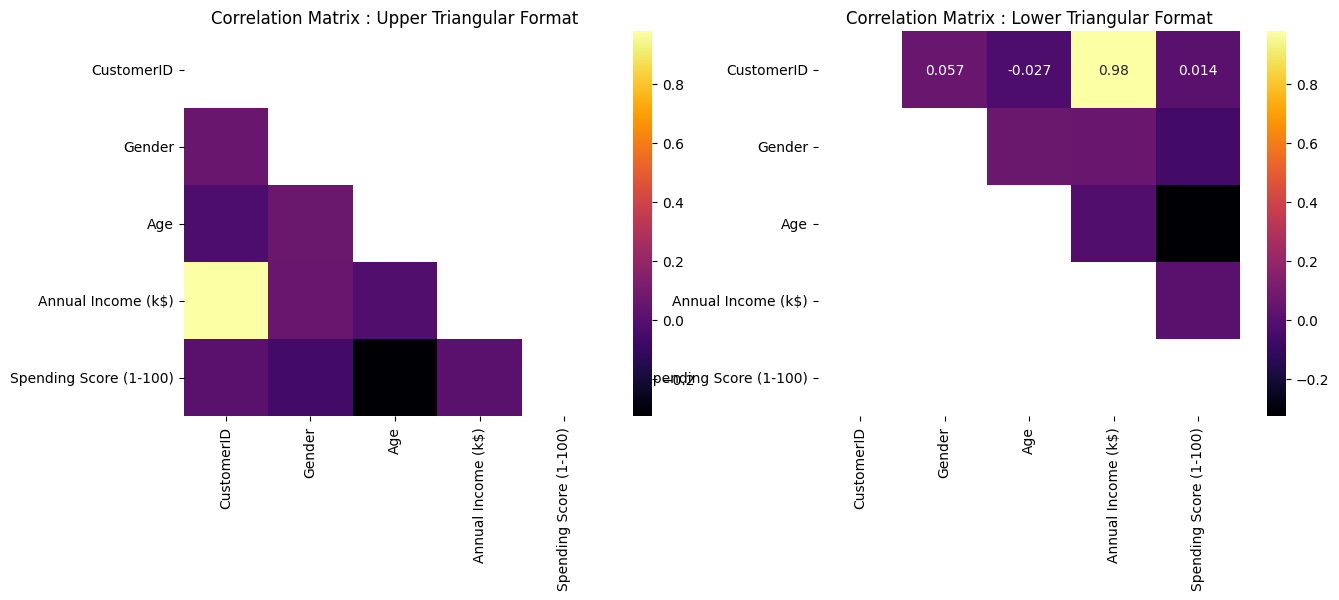

In [40]:
ut = np.triu(df1.corr())
lt = np.tril(df1.corr())

fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(df1.corr(),cmap = 'inferno',annot = True,cbar = 'True',mask = ut);
plt.title('Correlation Matrix : Upper Triangular Format');

plt.subplot(1,2,2)
sns.heatmap(df1.corr(),cmap = 'inferno',annot = True,cbar = 'True',mask = lt);
plt.title('Correlation Matrix : Lower Triangular Format');

df1.drop(columns = 'CustomerID',inplace = True)

- Both the matrix displayed are same! It is only done for visualization purpose. This trick can be used when the dataset has too many features to look into! 
- **CustomerID** displays a very high positive correlation with **Annual Income (k\\$)** as the customers are arranged in ascending order according to their **Annual Income (k\\$)**. We are not going to include **CustomerID** for modeling purpose.
- **Gender** does not display any relation with other features. It is pretty much neutral with all the values sticking to 0.
- **Spending Score (1-100)** and **Age** display a negative correlation i.e if value of one feature increases, then another feature's value decreases and vice-versa is true!
- This information is gained from the **EDA** section the correlation matrix values further back the evidence. 
- We will now move to the modeling section by creating combinations of these features and finding different ways in which the mall customers can be segmented!

### Data Scaling :

Kun käytät K-means-klusterointia, on tärkeää suorittaa datan asteikointi tai normalisointi varmistaaksesi, että kaikki piirteet ovat samassa asteikossa. Tämä on tärkeää, koska K-means-algoritmi perustuu etäisyyksiin datapisteklusterien keskipisteiden välillä. Jos piirteet eivät ole samassa asteikossa, ne voivat vaikuttaa klusterointiprosessiin.

Kun olet suorittanut asteikoinnin tai normalisoinnin, voit käyttää näitä skaalattuja piirteitä K-means-klusteroinnin suorittamiseen. Tämä auttaa varmistamaan, että jokainen piirre vaikuttaa klusterointiprosessiin tasapuolisesti ja perustuu etäisyyksiin klusterien keskipisteiden välillä

Tällä koodilla normalisoidaan (muunnetaan arvot tietylle alueelle) "Age", "Annual Income (k$)" ja "Spending Score (1-100)" -sarakearvot käyttäen Min-Max-normalisointia. Normalisointi voi olla hyödyllistä, kun halutaan varmistaa, että numeeriset ominaisuudet ovat samassa mittakaavassa, jotta ne toimivat hyvin monissa koneoppimismalleissa.

- Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.

- We have 2 options for data scaling : 
    
    1) **Normalization** 
    
    2) **Standardization**. 


- As most of the algorithms assume the data to be normally (Gaussian) distributed, **Normalization** is done for features that does not display a normal distribution and **standardization** is carried out for features that are normally distributed but the range of values is huge or small as compared to other features.

- For the above dataset, we have carried out **Normalization** for 3 features : **Age**, **Annual Income (k\\$)** and **Spending Score (1-100)**. **Gender** feature is left untouched.

In [41]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

# Label Encoding 
df2 = df1.copy(deep = True)

# Normalization
df2['Age'] = mms.fit_transform(df2[['Age']])
df2['Annual Income (k$)'] = mms.fit_transform(df2[['Annual Income (k$)']])
df2['Spending Score (1-100)'] = mms.fit_transform(df2[['Spending Score (1-100)']])

- In order to highlight the difference between performance of the models when trained on original dataset and normalized dataset, we create a copy of the original dataset and apply the normalization transformation on it!

**We will now move to the modeling section!**

# <center>Modeling</center>

- **Unsupervised Learning** : It is a problem where the target variable / feature is unknown. **Unsupervised Learning** problems widely occur in medical domain where mutliple readings are taken and the underlying diseases are unknown. 
- Thus, searching for patterns by using visualization techniques provides us with some underlying insight that cannot be understood by staring into the tabular data.
- However, when the size of the datasets becomes huge with too many features, data visualization can be a tedious task to execute. Hence, we move towards **K-Means Clustering** algorithm which **does not support categorical features**. 
- It is the most preferred algorithm for dealing with **Unsupervised Learning** that does the job of finding clusters / groups in data but with a mathematical approach :
    - Selects 2 (assume k = 2) centroids randomly.
    - Distance between the centroids and all the data points are calculated.
    - If the data point is closer to one of the centroids, then it gets labelled as that centroid and vice-versa.
    - For the 2 clusters formed, average value of the data points, grouped with either of the centroid, is calculated and these average values are then defined as the new clusters.
    - This process repeats itself untill both centroids converge to fixed points.
- **k hyperparameter** : It defines the number of clusters or groups the data is to be divided into. For the selection of values of **k**, we use 2 statistical tests :
    - **Elbow Method** : It is a method that plots the sum of squared error for a range of values of **k**. If this plot looks like an arm, then **k** the value that resembles an **elbow** is selected. From this **elbow** value, sum of squared values (inertia) starts decreasing in a linear fashion and thus is considered as an optimal value.
    - **Silhouette Score Method** : It is a method that evaluates the quality of clusters in terms of how well data points are clustered with other data points that are similar to each other. This score is calculated using the distance formula and the **k** value with highest score is selected for modeling.
    
**We will now create models by training them on the combination of the features selected from the above tests and visualize as well.**

In [42]:
# Dropping categorical feature 
df1.drop(columns = 'Gender',inplace = True)
df2.drop(columns = 'Gender',inplace = True)

### <center>Age - Annual Income (k\$)</center>

In [43]:
m1 = df1[['Age','Annual Income (k$)']].values # Original Dataset
m2 = df2[['Age','Annual Income (k$)']].values # Normalized Dataset

### Original Dataset :

#### Elbow Method & Silhouette Score Method :

Tämä koodinpätkä suorittaa klusterointimallin k-keskiarvojen (K-Means) valinnan kahdella eri menetelmällä: kyynärpäämenetelmällä (Elbow Method) ja siluettiluku-menetelmällä (Silhouette Score Method). Koodi käyttää `sse` ja `sil` sanakirjoja tallentamaan Sum of Squared Error (SSE) ja siluettiluvut eri klusterimäärille ja luo sitten kuvaajat näiden arvojen perusteella. Tässä on selitys koodin toiminnasta:

1. `sse = {}` - Alustetaan tyhjä sanakirja tallentamaan SSE arvot.

2. `sil = []` - Alustetaan tyhjä lista tallentamaan siluettiluvut.

3. `kmax = 10` - Määritellään maksimiarvo klusterimäärälle.

4. `fig = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))` - Alustetaan kaksi kuvaajaa, joista kumpikin on yksi rivi ja kaksi saraketta kooltaan 20x5 tuumaa.

Tämä koodi auttaa valitsemaan sopivan klusterimäärän K-Means-mallille käyttämällä kyynärpäämenetelmää (elbow method) ja siluettiluku-menetelmää. Kyynärpäämenetelmässä yritetään etsiä "kyynärpääkohta" kuvaajasta, jossa SSE alkaa laskea nopeasti ja se osoittaa optimaalisen klusterimäärän. Siluettiluku-menetelmässä yritetään löytää korkea siluettiluku, joka kuvaa kuinka hyvin klusterit ovat erillisiä toisistaan. Kumpikin menetelmä voi auttaa tunnistamaan optimaalisen klusterimäärän.

C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

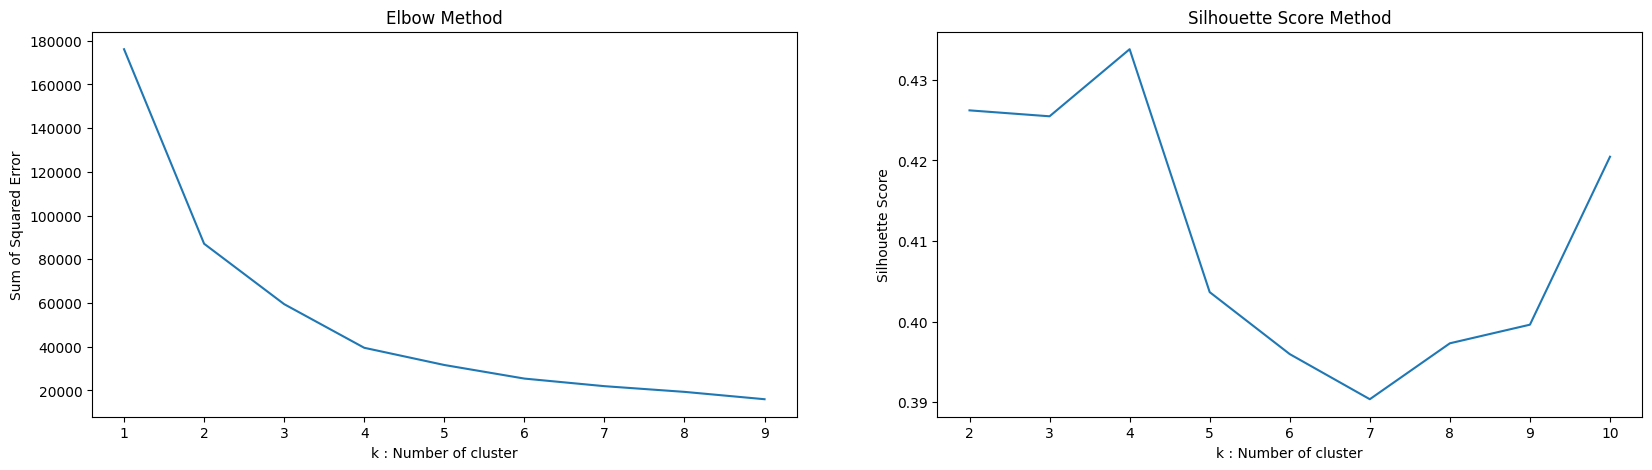

In [44]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
# Valitaan ensimmäinen kuvaaja
plt.subplot(1,2,1)
# Käydään läpi klusterimäärät 1-9
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m1) # Sovitetaan K-Means-malli datalle `m1` käyttäen k klusteria.
    sse[k] = kmeans.inertia_ # Tallennetaan SSE sanakirjaan `sse`: `inertia_`, joka on K-Means-mallin ominaisuus, joka kertoo keskimääräisen etäisyyden näytteiden ja niiden lähimmän klusterin keskipisteen välillä.
sns.lineplot(x = list(sse.keys()), y = list(sse.values())); # Piirretään viiva, joka kuvaa klusterimäärän ja siluettiluvun arvojen välistä suhdetta.
plt.title('Elbow Method') #  Asetetaan kuvaajan otsikko.
plt.xlabel("k : Number of cluster") # Asetetaan x-akselin merkintä.
plt.ylabel("Sum of Squared Error") #  Asetetaan y-akselin merkintä

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(m1)
    labels = kmeans.labels_
    sil.append(silhouette_score(m1, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

- From the results of the above 2 methods, we select :
    - **k : Clusters = 4**

C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


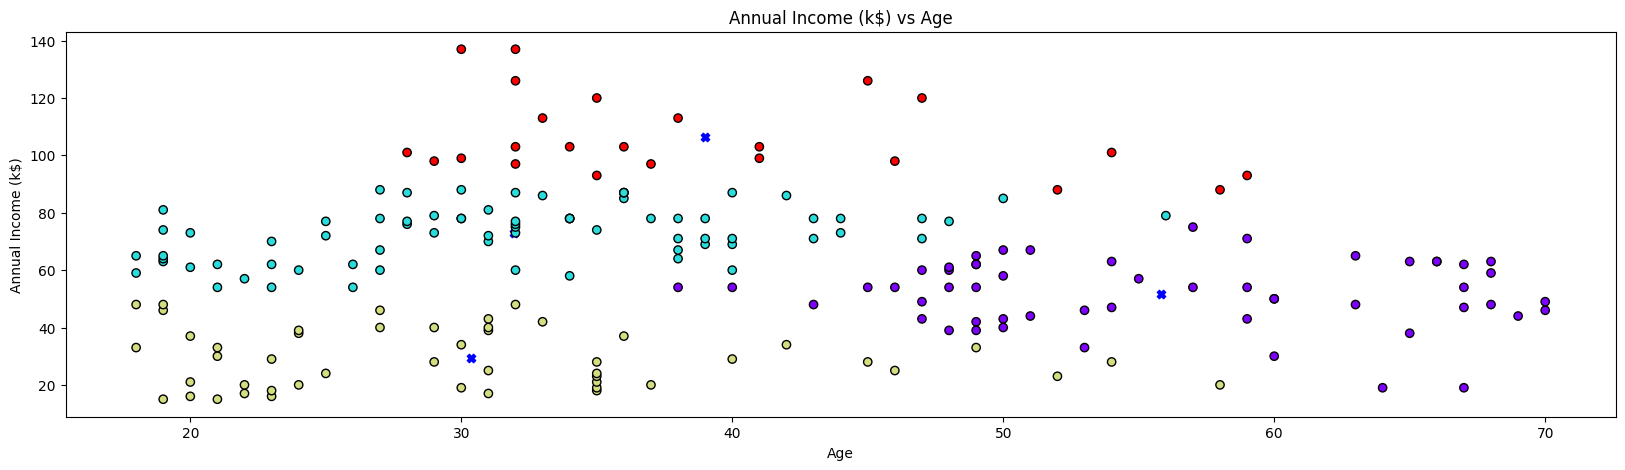

In [45]:
model = KMeans(n_clusters = 4,max_iter = 1000)
model.fit(m1)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_

plt.figure(figsize = (20,5))
plt.scatter(centroids[:,0],centroids[:,1], marker = "X", color = 'b')
plt.scatter(x = 'Age',y = 'Annual Income (k$)',c = labels,cmap = 'rainbow',data = df1,edgecolor = 'black');
plt.title('Annual Income (k$) vs Age')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show();

### Normalized Dataset :

#### Elbow Method & Silhouette Score Method :

C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

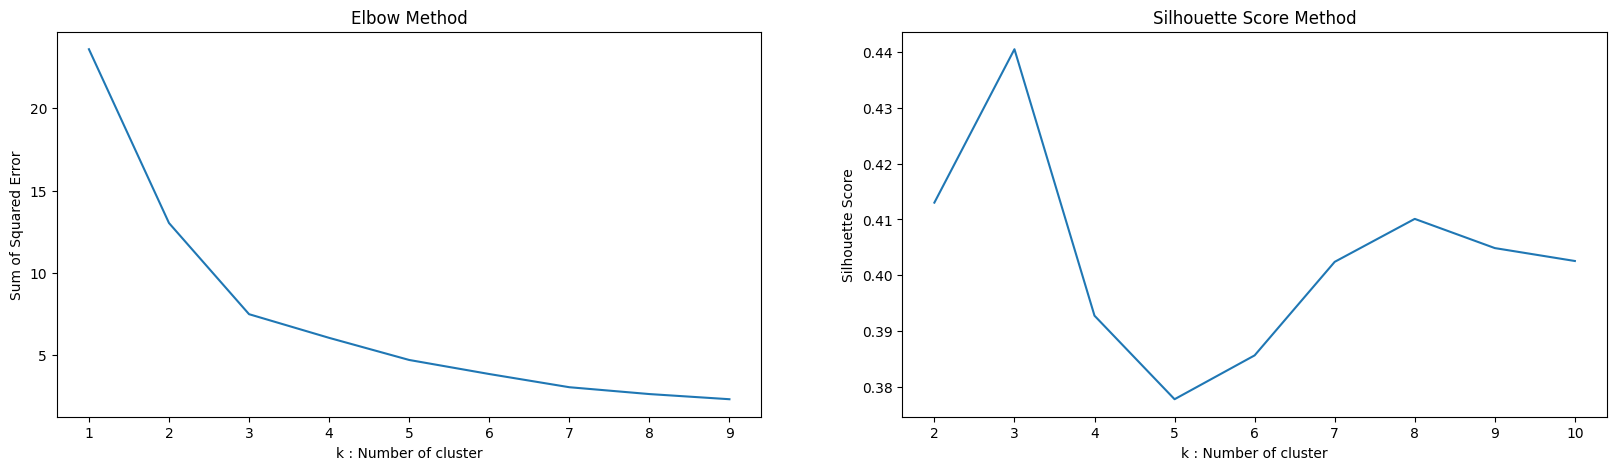

In [46]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m2)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(m2)
    labels = kmeans.labels_
    sil.append(silhouette_score(m2, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

- From the results of the above 2 methods, we select :
    - **k : Clusters = 3**

C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


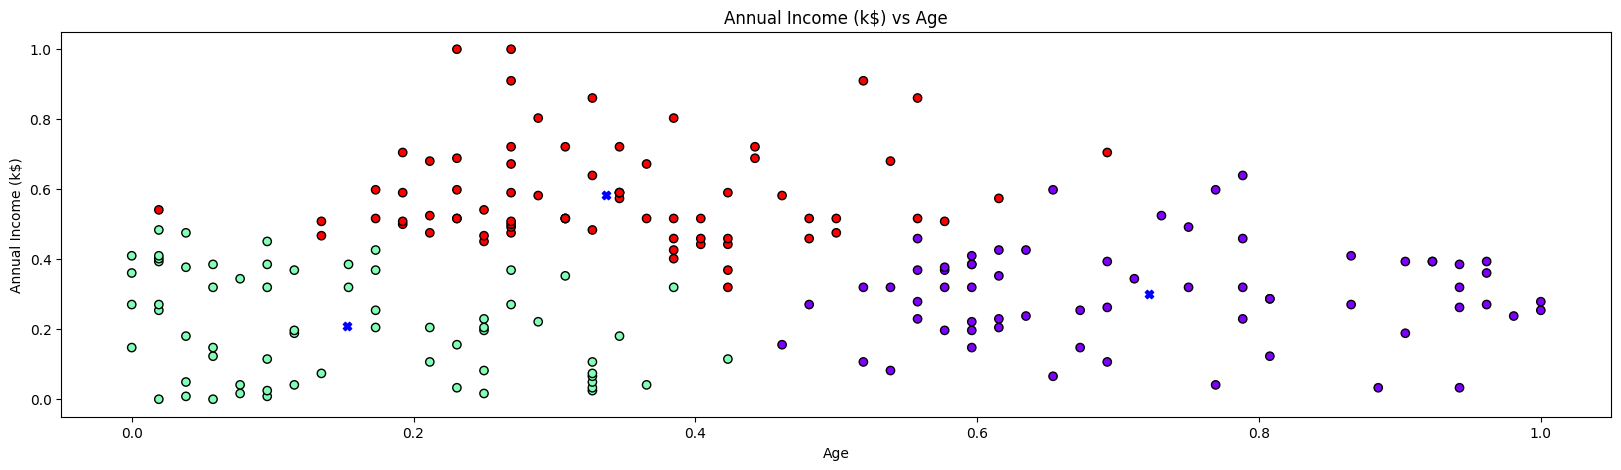

In [47]:
model = KMeans(n_clusters = 3,max_iter = 1000)
model.fit(m2)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_

plt.figure(figsize = (20,5))
plt.scatter(centroids[:,0],centroids[:,1], marker = "X", color = 'b')
plt.scatter(x = 'Age',y = 'Annual Income (k$)',c = labels,cmap = 'rainbow',data = df2,edgecolor = 'black');
plt.title('Annual Income (k$) vs Age')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show();

### <center>Age - Spending Score (1-100)</center>

In [48]:
m1 = df1[['Age','Spending Score (1-100)']].values # Original Dataset
m2 = df2[['Age','Spending Score (1-100)']].values # Normalized Dataset

### Original Dataset :

#### Elbow Method & Silhouette Score Method :

C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

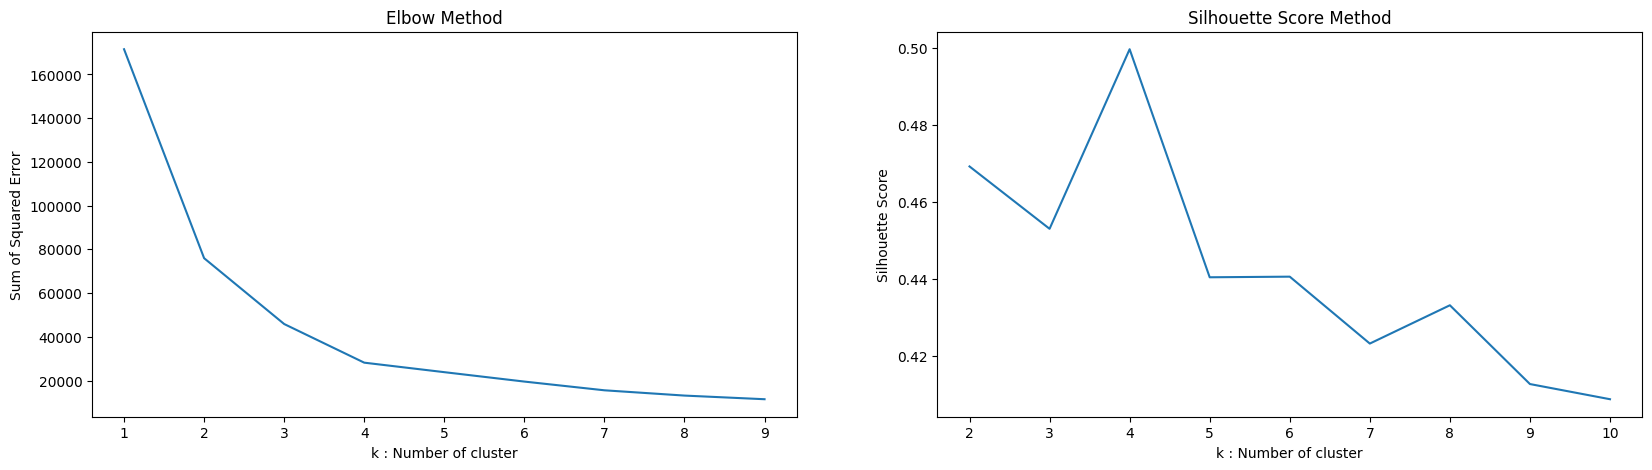

In [49]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m1)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(m1)
    labels = kmeans.labels_
    sil.append(silhouette_score(m1, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

- From the results of the above 2 methods, we select :
    - **k : Clusters = 4**

C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


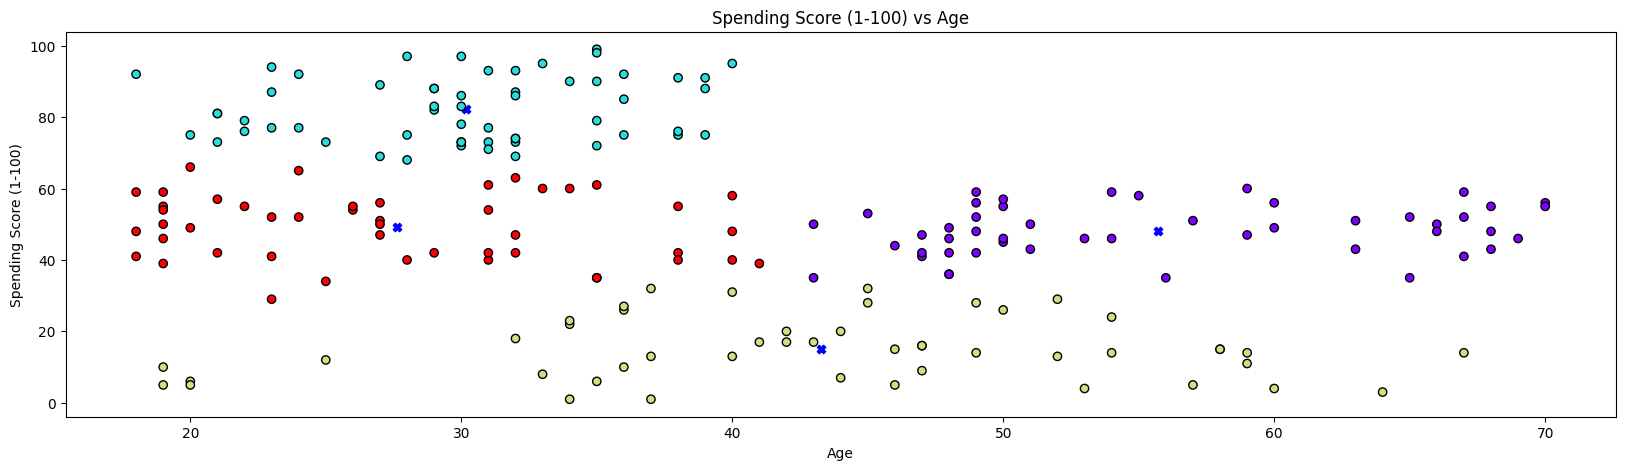

In [50]:
model = KMeans(n_clusters = 4,max_iter = 1000)
model.fit(m1)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_

plt.figure(figsize = (20,5))
plt.scatter(centroids[:,0],centroids[:,1], marker = "X", color = 'b')
plt.scatter(x = 'Age',y = 'Spending Score (1-100)',c = labels,cmap = 'rainbow',data = df1,edgecolor = 'black');
plt.title('Spending Score (1-100) vs Age')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show();

### Normalized Dataset :

#### Elbow Method & Silhouette Score Method :

C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

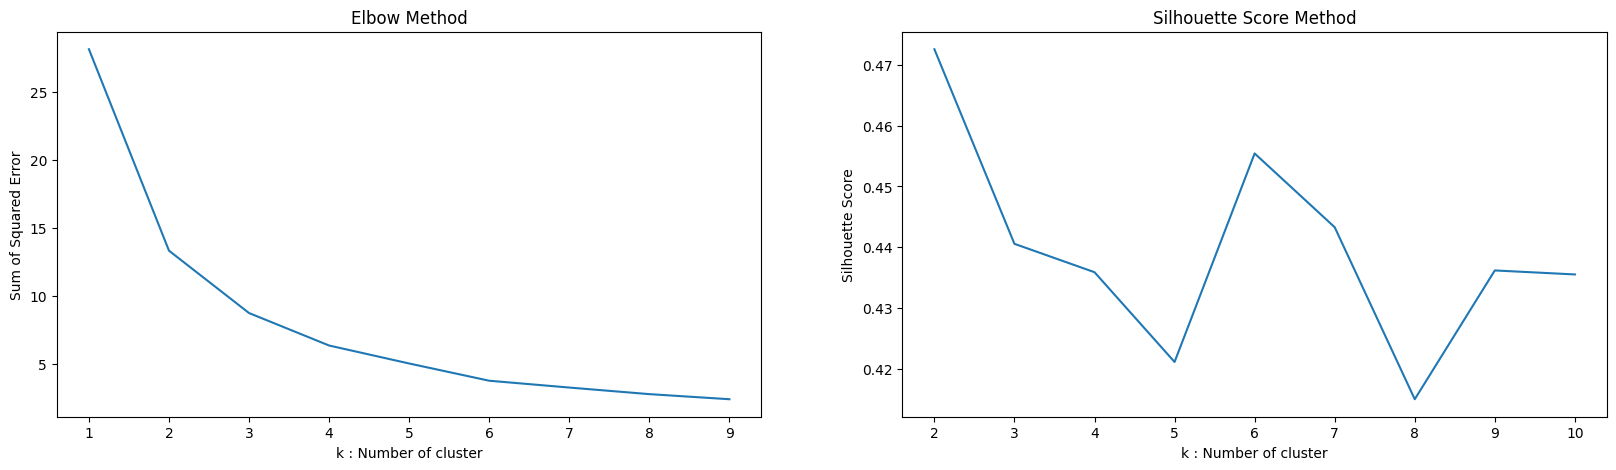

In [51]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m2)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(m2)
    labels = kmeans.labels_
    sil.append(silhouette_score(m2, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

- From the results of the above 2 methods, we select :
    - **k : Clusters = 6**

C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


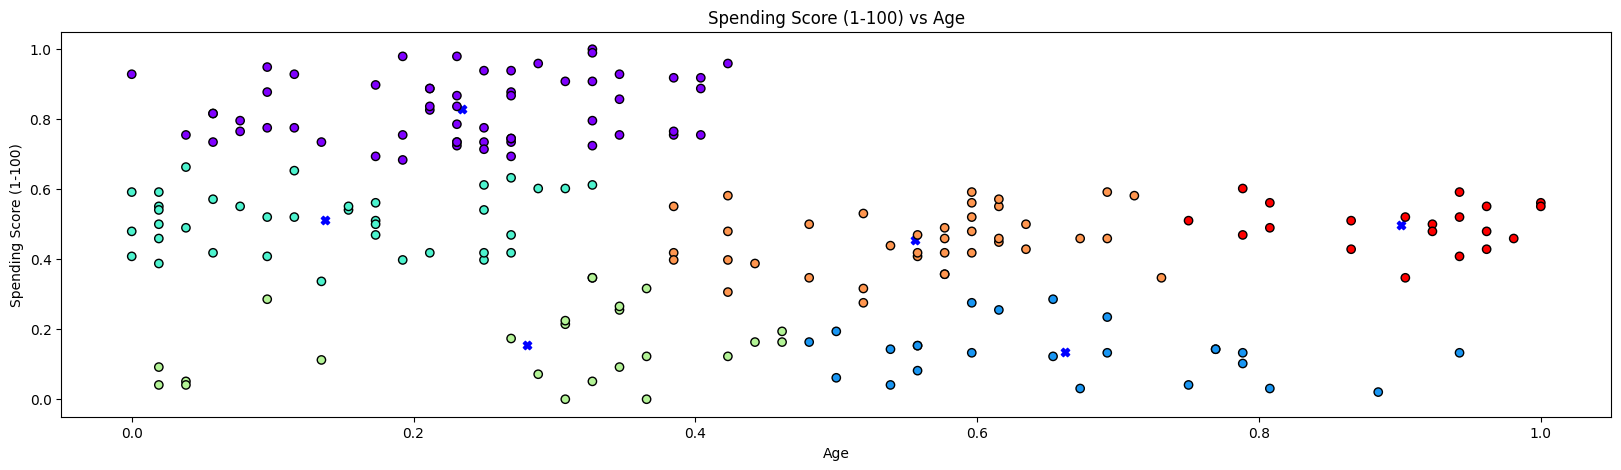

In [52]:
model = KMeans(n_clusters = 6,max_iter = 1000)
model.fit(m2)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_

plt.figure(figsize = (20,5))
plt.scatter(centroids[:,0],centroids[:,1], marker = "X", color = 'b')
plt.scatter(x = 'Age',y = 'Spending Score (1-100)',c = labels,cmap = 'rainbow',data = df2,edgecolor = 'black');
plt.title('Spending Score (1-100) vs Age')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show();

### <center>Annual Income (k\$) - Spending Score (1-100)</center>

In [53]:
m1 = df1[['Annual Income (k$)', 'Spending Score (1-100)']].values # Original Dataset
m2 = df2[['Annual Income (k$)', 'Spending Score (1-100)']].values # Normalized Dataset

### Original Dataset :

#### Elbow Method & Silhouette Score Method :

C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

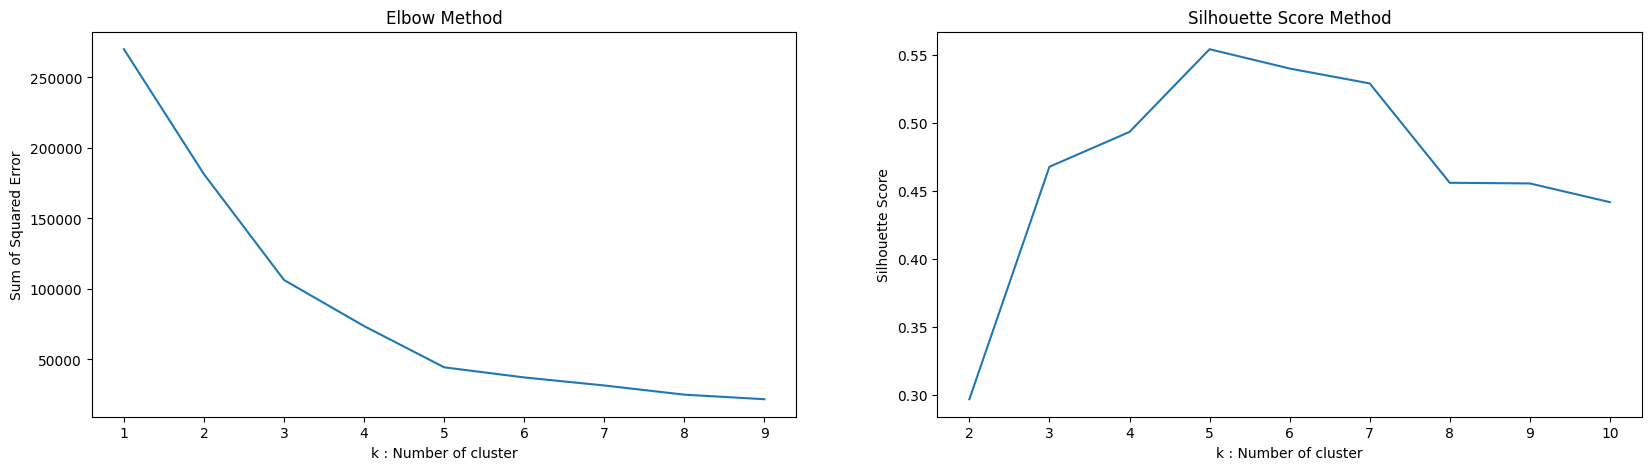

In [54]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m1)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(m1)
    labels = kmeans.labels_
    sil.append(silhouette_score(m1, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

- From the results of the above 2 methods, we select :
    - **k : Clusters = 5**

C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


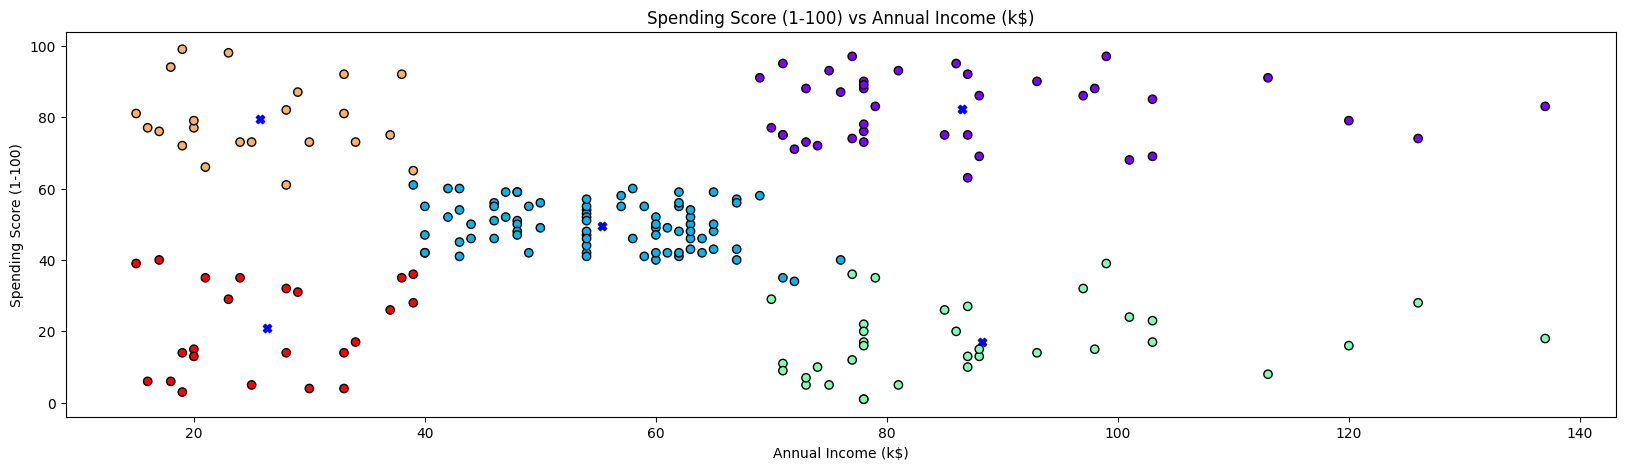

In [55]:
model = KMeans(n_clusters = 5,max_iter = 1000)
model.fit(m1)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_

plt.figure(figsize = (20,5))
plt.scatter(centroids[:,0],centroids[:,1], marker = "X", color = 'b')
plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',c = labels,cmap = 'rainbow',data = df1,edgecolor = 'black');
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show();

### Normalized Dataset :

#### Elbow Method & Silhouette Score Method :

C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

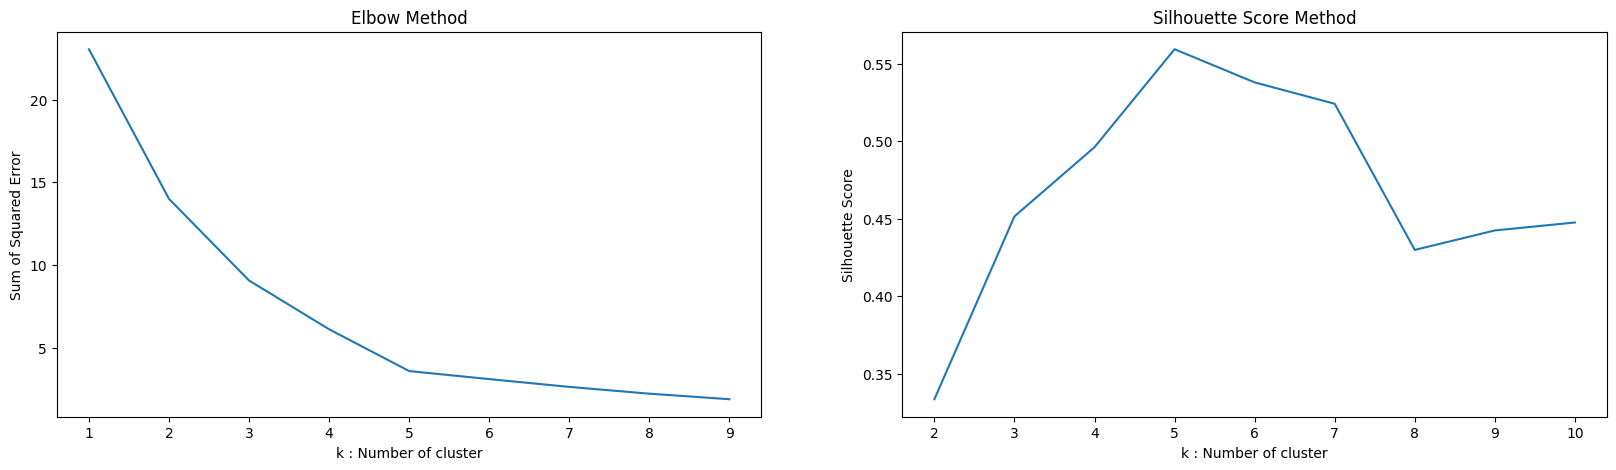

In [56]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m2)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(m2)
    labels = kmeans.labels_
    sil.append(silhouette_score(m2, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

- From the results of the above 2 methods, we select :
    - **k : Clusters = 5**

C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


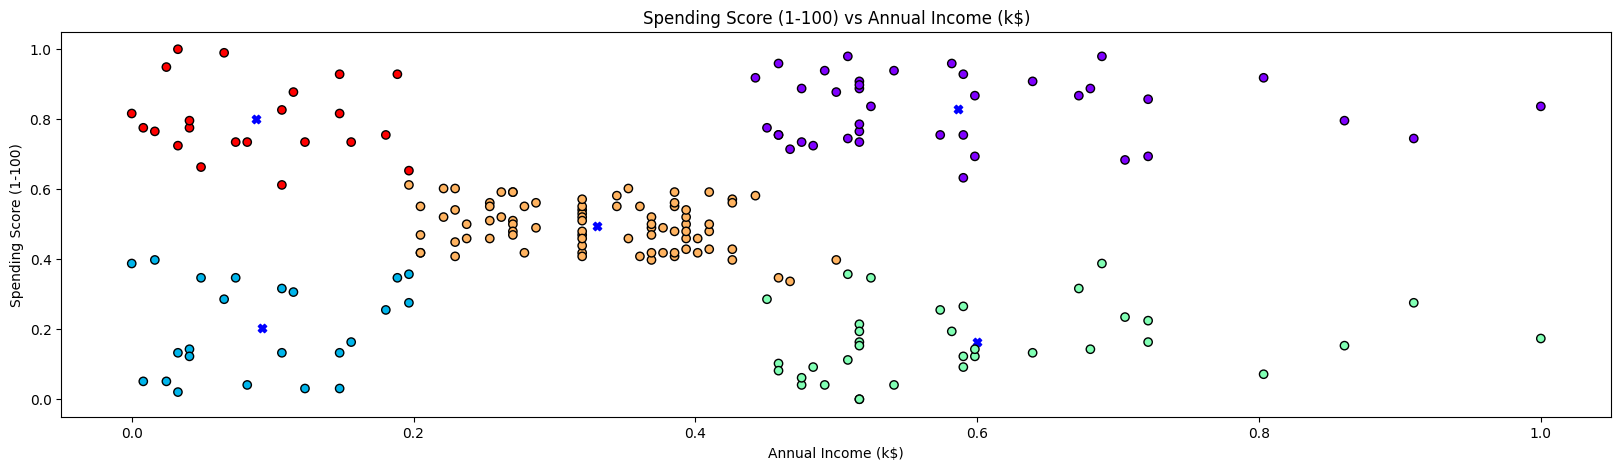

In [57]:
model = KMeans(n_clusters = 5,max_iter = 1000)
model.fit(m2)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_

plt.figure(figsize = (20,5))
plt.scatter(centroids[:,0],centroids[:,1], marker = "X", color = 'b')
plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',c = labels,cmap = 'rainbow',data = df2,edgecolor = 'black');
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show();

### <center>Age - Annual Income (k\$) - Spending Score (1-100)</center>

In [58]:
m1 = df1[['Age','Annual Income (k$)','Spending Score (1-100)']].values # Original Dataset
m2 = df2[['Age','Annual Income (k$)','Spending Score (1-100)']].values # Normalized Dataset

### Original Dataset :

#### Elbow Method & Silhouette Score Method :

C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

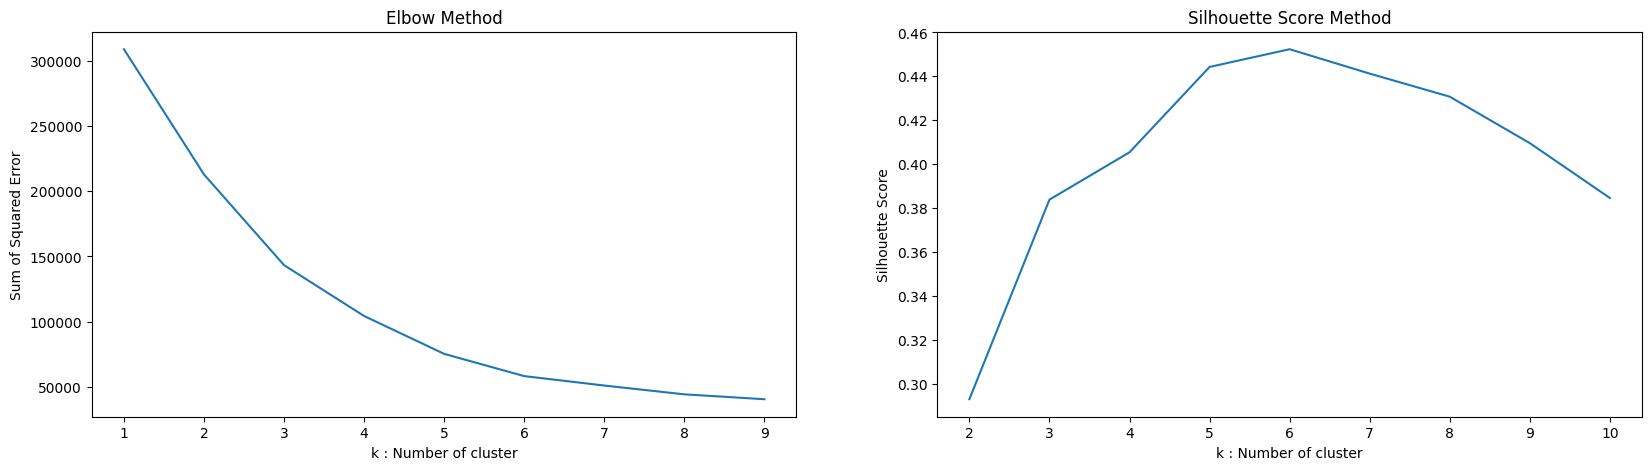

In [59]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m1)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(m1)
    labels = kmeans.labels_
    sil.append(silhouette_score(m1, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

- From the results of the above 2 methods, we select :
    - **k : Clusters = 6**

C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


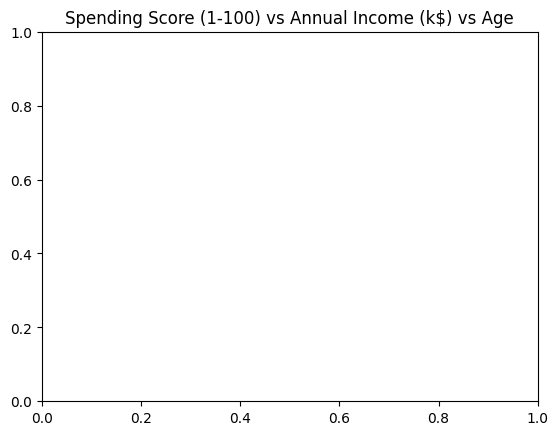

In [60]:
model = KMeans(n_clusters = 6,max_iter = 1000)
model.fit(m1)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_

fig = plt.figure()
ax = Axes3D(fig)
x = np.array(df1['Annual Income (k$)'])
y = np.array(df1['Spending Score (1-100)'])
z = np.array(df1['Age'])
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2],marker="X", color = 'b')
ax.scatter(x,y,z,c = y)
plt.title('Spending Score (1-100) vs Annual Income (k$) vs Age')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
plt.show();

### Normalized Dataset

#### Elbow Method & Silhouette Score Method :

C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

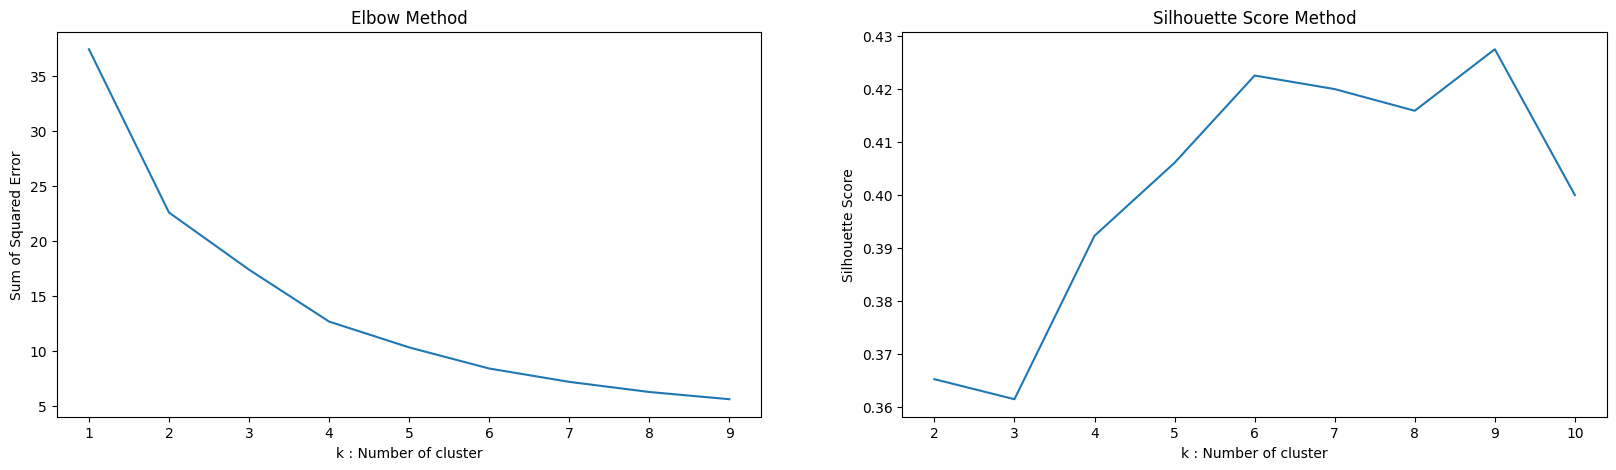

In [61]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m2)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(m2)
    labels = kmeans.labels_
    sil.append(silhouette_score(m2, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

## Sagan lisäämät koodit K-mean opettajan mallin mukaisesti:

In [63]:
kmeans.inertia_

4.998024842132429

# Miten valitsemme tuon pisteen arvon

In [67]:
point_to_be_predicted=np.array([[7.5,2,3]])

In [68]:
kmeans.predict(point_to_be_predicted)

array([6])

In [70]:
kmeans.cluster_centers_

array([[0.13986014, 0.08792846, 0.79962894],
       [0.59615385, 0.60122951, 0.18520408],
       [0.55949519, 0.33247951, 0.47767857],
       [0.28580902, 0.52091577, 0.82828994],
       [0.12980769, 0.33427254, 0.49489796],
       [0.30944056, 0.07004471, 0.24953618],
       [0.90096154, 0.31270492, 0.49846939],
       [0.25274725, 0.6088993 , 0.12609329],
       [0.71538462, 0.09754098, 0.12244898],
       [0.27307692, 0.77622951, 0.82653061]])

# Tarvitsemmeko Debugging? 

- From the results of the above 2 methods, we select :
    - **k : Clusters = 6**

C:\Users\sagan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


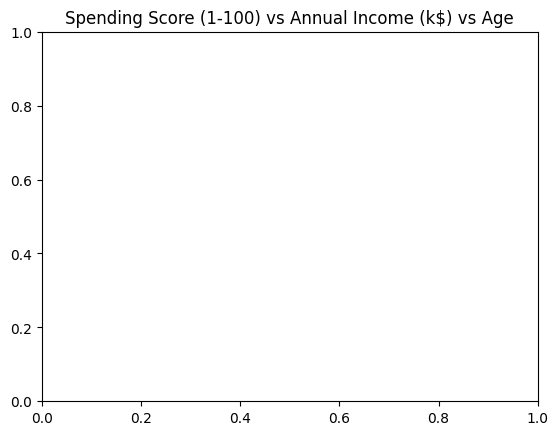

In [62]:
model = KMeans(n_clusters = 6,max_iter = 1000)
model.fit(m2)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_

fig = plt.figure()
ax = Axes3D(fig)
x = np.array(df2['Annual Income (k$)'])
y = np.array(df2['Spending Score (1-100)'])
z = np.array(df2['Age'])
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2],marker = "X", color = 'b')
ax.scatter(x,y,z,c = y)
plt.title('Spending Score (1-100) vs Annual Income (k$) vs Age')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
plt.show();

### <center>Results Table</center>

#### Original Dataset :

|Sr. No.|Feature Combination|Number of Clusters|
|-|-|-|
|1.|Age - Annual Income (k\$)|4|
|2.|Age - Spending Score (1-100)|4|
|3.|Annual Income (k\$) - Spending Score (1-100)|5|
|4.|Age - Annual Income (k\$) - Spending Score (1-100)|6|

#### Normalized Dataset :

|Sr. No.|Feature Combination|Number of Clusters|
|-|-|-|
|1.|Age - Annual Income (k\$)|3|
|2.|Age - Spending Score (1-100)|6|
|3.|Annual Income (k\$) - Spending Score (1-100)|5|
|4.|Age - Annual Income (k\$) - Spending Score (1-100)|6|

# <center>Conclusion</center>

- This dataset is great for understanding how to deal with unpsupervised learning problems. It presents the opportunity to work on a Business Problem that can be utilized for creating varied strategies to boost sales. 


- For unsupervised learning problems, EDA proves to be very valuable to uncover the hidden insights from the data. However, complexity of visualizations can be an obstacle as the number of features and size of the data increase.


- For K-Means clustering algorithm, selection of the hyperparameter **k** is crucial and it is done with the help of statistical tests. There is not much difference in model performance when trained on the original dataset or normalized dataset in this case.

### Notebook Contents :
- Dataset Information
- Exploratory Data Analysis (EDA)
- Summary of EDA
- Feature Engineering
- Modeling
- Conclusion

### What you will learn :
- Data Visualization techniques. 
- Information on K-Means Clustering Algorithm.
- Statistical Tests for hyperparameter selection.
- Difference in model performance when trained on original & normalized dataset.

### Recent Work :

- [Binary Classification](https://www.kaggle.com/competitions/titanic/discussion/352223) **: It describes the approach required to deal with Binary Classification problems explained through notebooks that contain work done on datasets with easy and understandable code explanation!**
- [Time Series Analysis](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/discussion/352205) **: It describes the basics of Time Series Analysis explained through notebooks that contain work done on datasets with easy and understandable code explanation!**

### Lets get started!